## Lista 2

MAI 103: Análise de Risco // Prof. Eber

Lista 02  //  Data: 19/06/2018  //  Entrega: 26/06/2018

Luis Filipe Kopp

1-Simule um jogo de cara ou coroa. Verifique a frequencia do número de caras com: 10, 100 e 1000 lançamentos.

In [1]:
for(N in c(10,100,1000)) print(sum(sample(0:1,N,replace=T)))

[1] 4
[1] 51
[1] 517


In [2]:
for(N in c(10,100,1000)) print(sum(rbinom(N,1,.5)))

[1] 4
[1] 49
[1] 522


2- Seja X uma VA que representa a soma de 12 VAs uniformes (0,1):

• 2a- Usando o TCL, obtenha uma aproximação analítica para a X, e calcule a média, a variância e esboce um gráfico dessa distribuição.

In [30]:
media <- 12 * (1^2/2 - 0^2/2)
var <- function(x) ( x^3/3)-(x^2/2)+(x/4)   ## integral de (x-1/2)^2 * 1 dx para ser aplicada entre 0 e 1 
variancia <- 12 * (var(1) - var(0))
print(c("média: ",media))
print(c("variancia",variancia))

[1] "média: " "6"      
[1] "variancia" "1"        


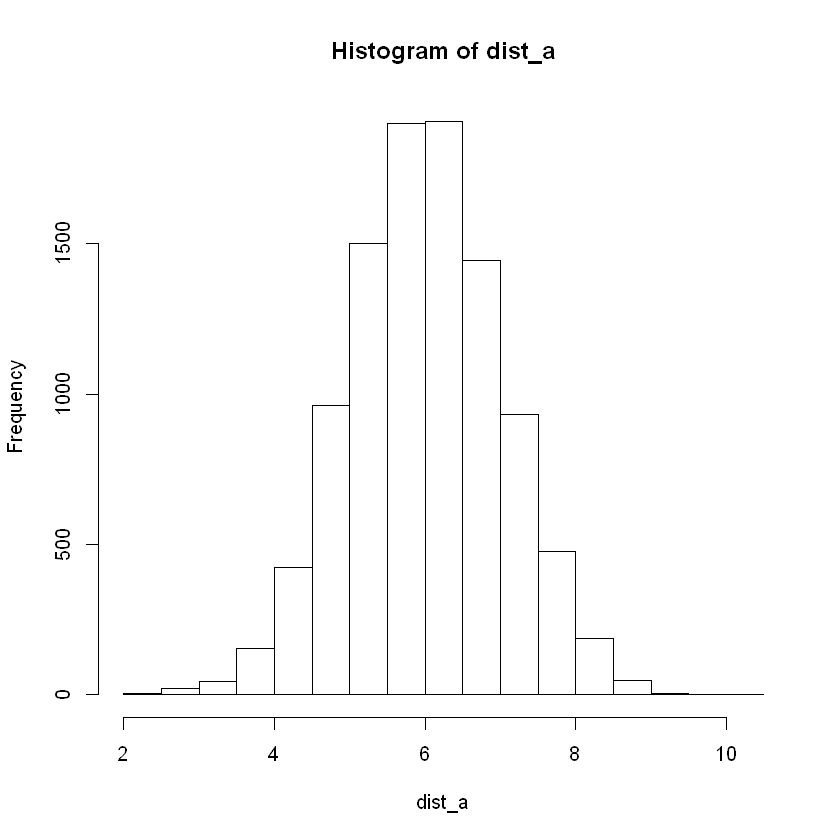

In [10]:
dist_a = rnorm(10000,media,sd=variancia^0.5)
hist(dist_a)

• 2b-idem ao 2a usando MC.

In [19]:
    amostra_total <- 0
    for (i in 1:12) {
      amostras <- runif(12000, min = 0, max = 1)
      amostra_total <- amostra_total + amostras 
    }
    media <- mean(amostra_total)
    variancia <- sd(amostra_total)^2
    media
    variancia

[1] 6.00619

[1] 1.003532

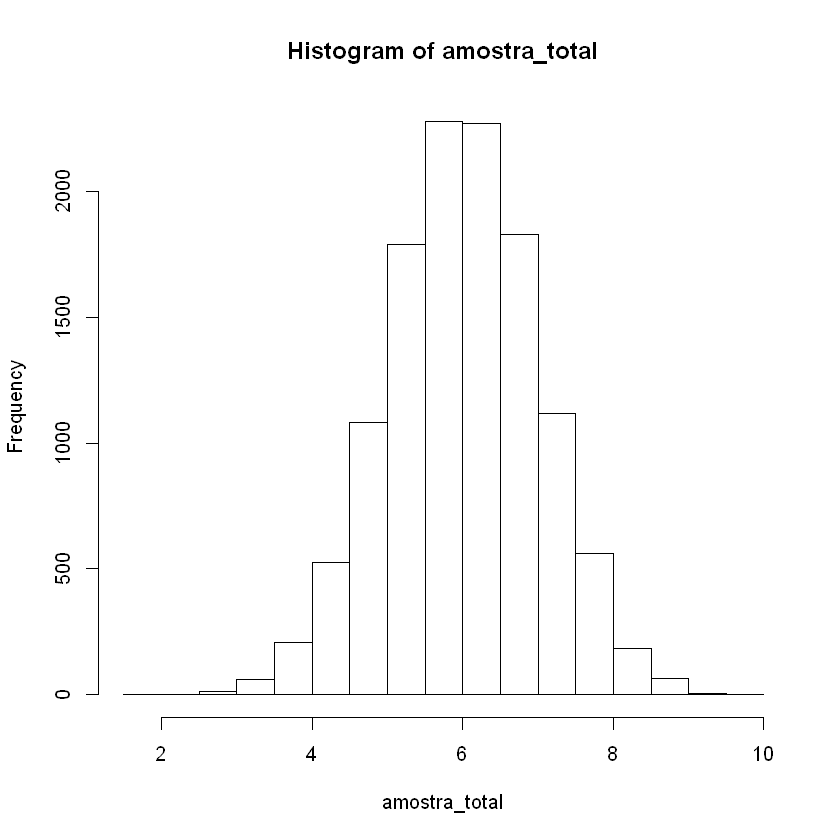

In [20]:
hist(amostra_total)

3- Usando MC, obtenha uma aproximação empírica para a VA que representa a soma de 10 distribuições triangulares Xi distribuidas com parâmetros (mini = i; maxi = 20 + i; mprovi = 10 + i). Calcule a média, a variância e plote um gráfico
de sua função de probabilidade.

In [26]:
library("triangle")

media <- c()
variancia <- c()
for(n in 1:1000){
    u <- 0
    v <- 0
    for(i in 1:10){
        X <- rtriangle(1000,i,20+i,10+1)
        u <-  mean(X) + u
        v <- sd(X)^2 + v
    }
    media <- c(media,u)
    variancia <- c(variancia,v)
}
mean(media)
mean(variancia)

[1] 140.0116

[1] 182.6143

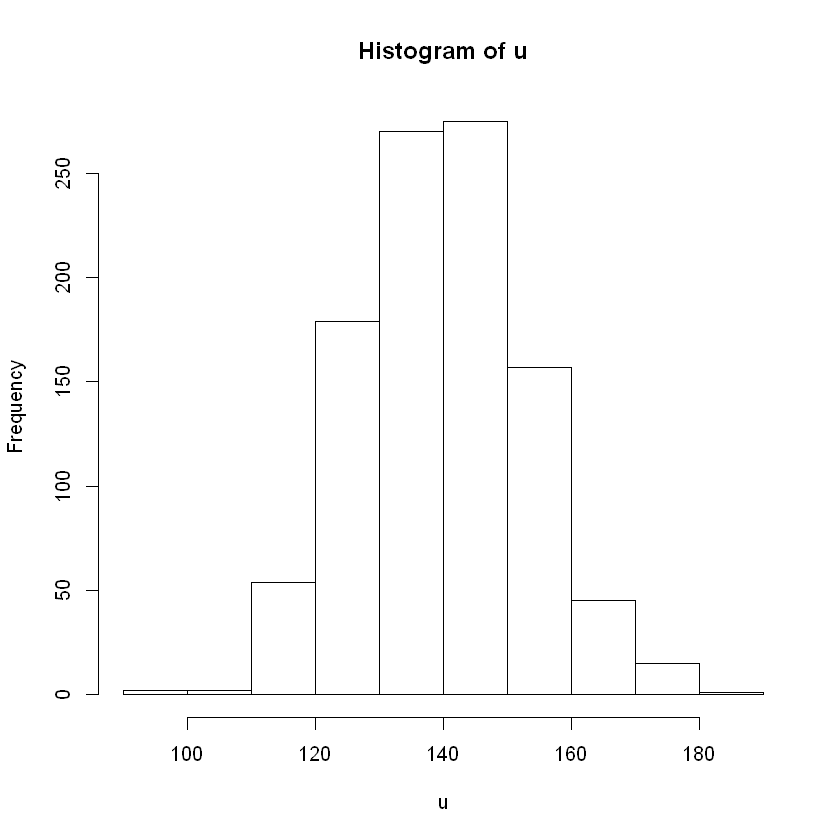

In [86]:
hist(u)

4- Usando simulação:

• 4a- obtenha uma aproximação empírica para a função de probabilidade do produto de duas VAs

Z = X ∗ Y; X; Y ∼ N(0; 1).

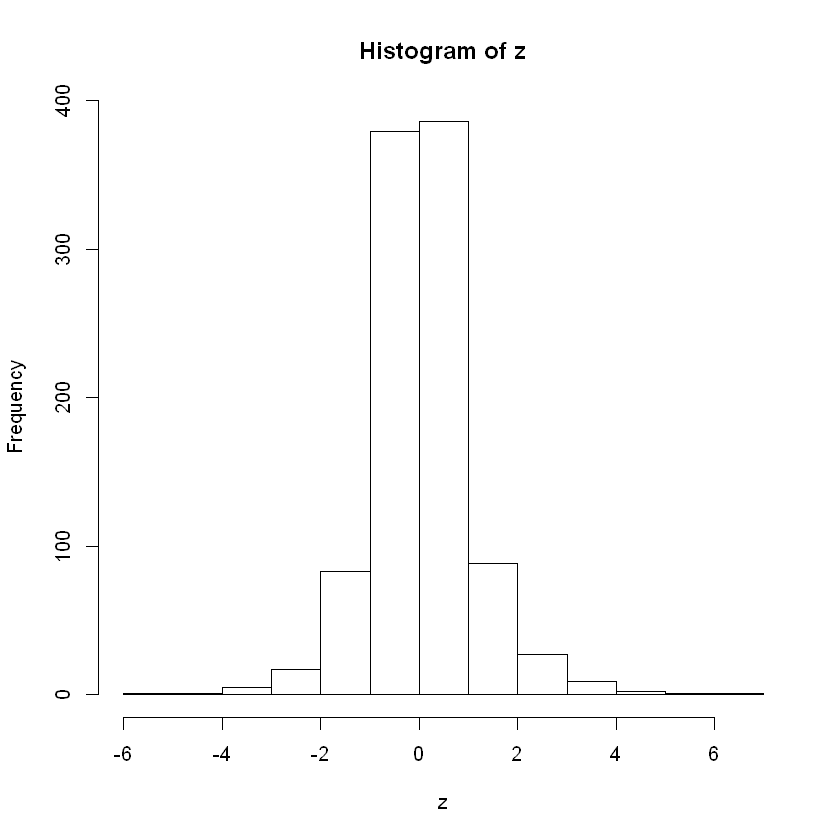

In [89]:
z <- rnorm(1000,0,1) * rnorm(1000,0,1)
hist(z)

• 4b- idem para o quociente Z = X/Y .

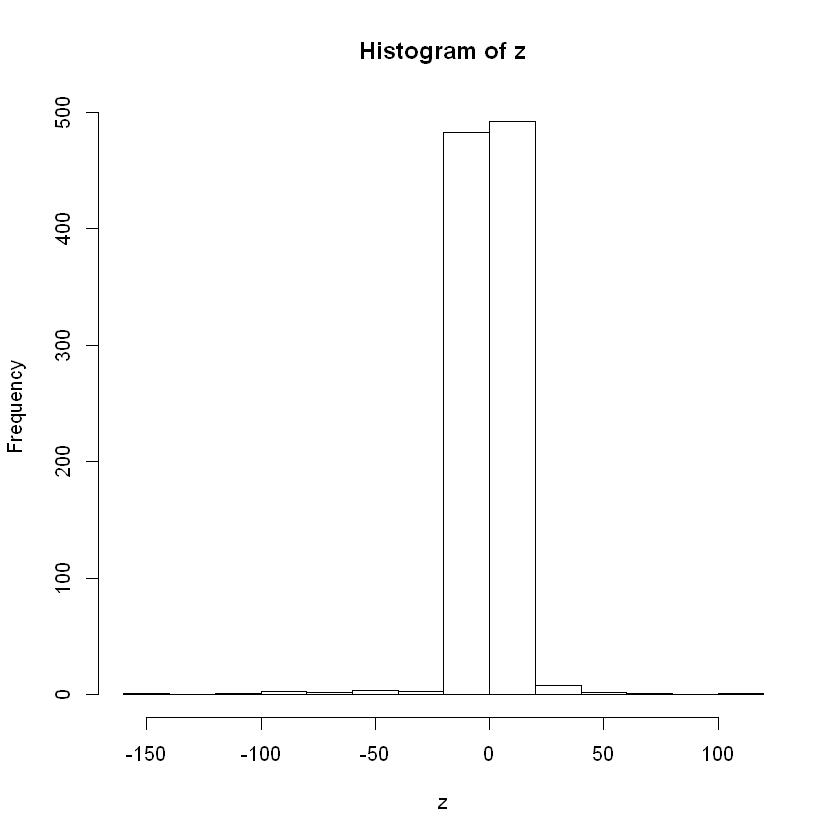

In [90]:
z <- rnorm(1000,0,1) / rnorm(1000,0,1)
hist(z)

5-Obtenha um aproximação empírica para a função de probabilidade Máximo(Xi)(i = 2; 5; 10) que representa a função de probabilidade do máximo dentre i VAs cada uma delas seguindo uma Normal(0; 1).

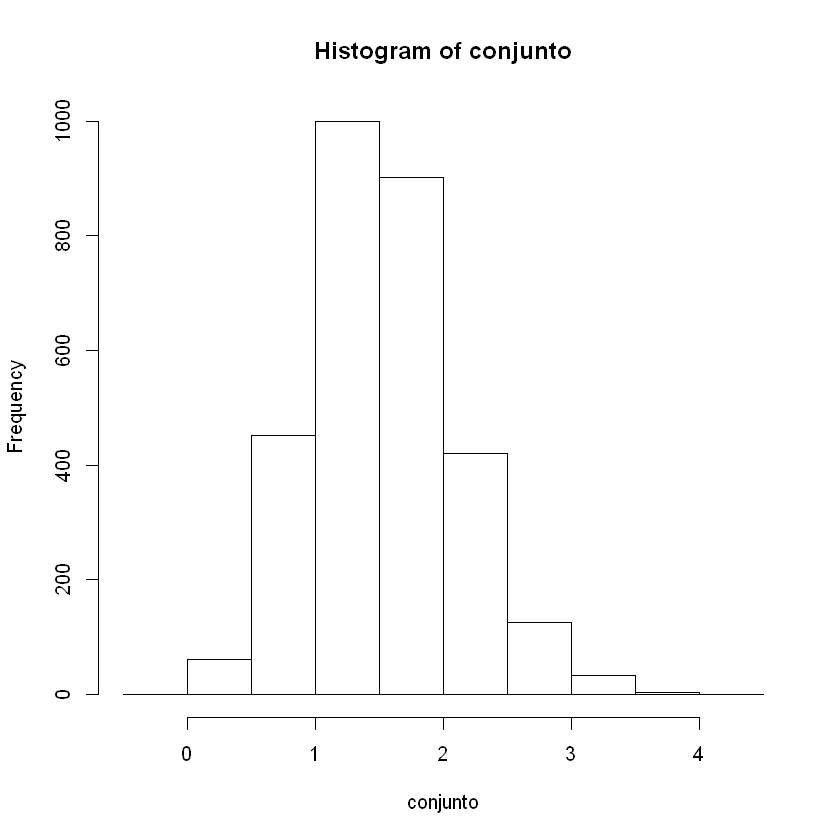

In [32]:
len = 3000
tam <- c(2,5,10)

for(t in 1:3 ){
    conjunto <- c()
for(l in 1:len){
x1 <- -Inf
for(t2 in 1:tam[t] )  x1 <- max(x1,rnorm(1,0,1))
conjunto <- c(conjunto,x1)
    }}
hist(conjunto)


6-Obtenha uma aproximação empírica para a função χ2(n) = Pn 1 Xi2 onde Xi ∼ Normal(0; 1).

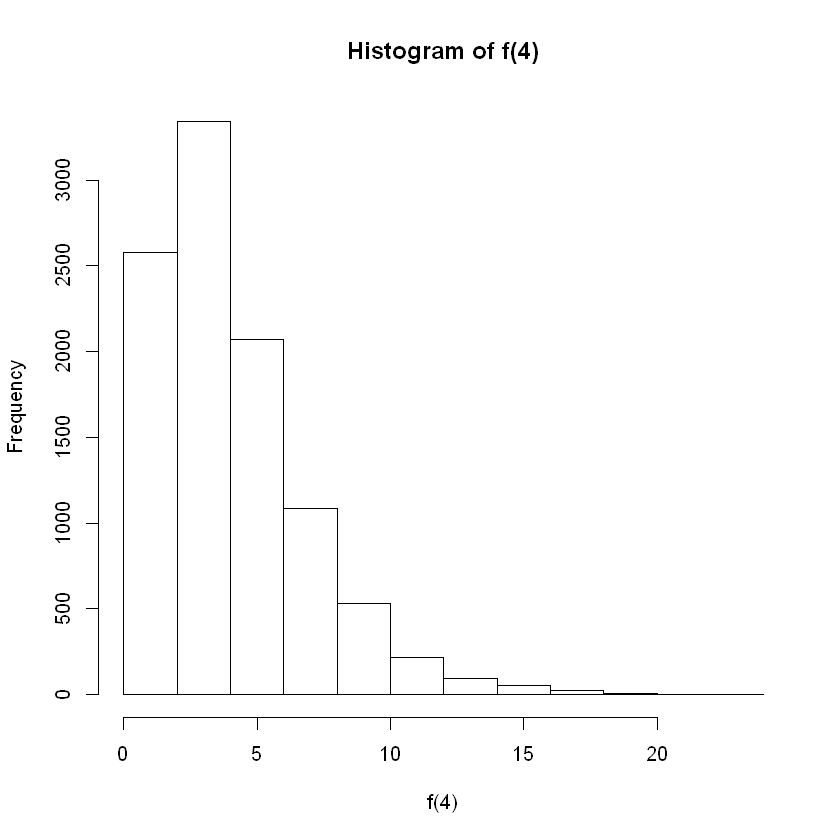

In [24]:
f <- function(n){
    x <- rep(0, 10000)
    for(h in 1:n) {
        x <- x + rnorm(10000,0,1) ^2
    }
    x
}
hist(f(4))

7-Obtenha uma aproximaçãao empirica para a função de probabilidade Z = eN(0;1)

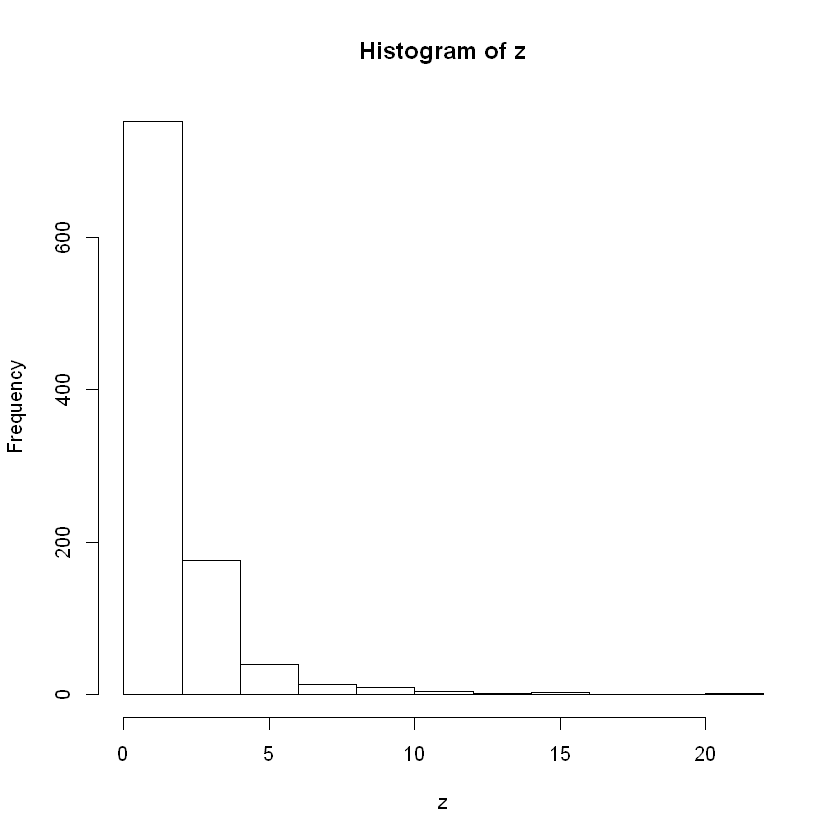

In [37]:
z <- exp(rnorm(1000,0,1))
hist(z)